# Setup

Before running this notebook, we need to get the repo which contains the data. The download should be quick as it's a sercer-to-server process.

In [1]:
# Get the repo
repo_dir = 'open-kbp'
!git clone https://github.com/ababier/open-kbp.git {repo_dir}

Cloning into 'open-kbp'...
remote: Enumerating objects: 4260, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 4260 (delta 38), reused 30 (delta 29), pack-reused 4208
Receiving objects: 100% (4260/4260), 523.57 MiB | 12.88 MiB/s, done.
Resolving deltas: 100% (1603/1603), done.
Updating files: 100% (4016/4016), done.


In [2]:
# Add repo to path
import sys
sys.path.append(repo_dir)

Also let's install the required libraries.

In [3]:
!pip install -r open-kbp/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 69.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 78.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.9/509.9 kB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 88.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

Import all necessary packages for the notebook.

In [4]:
# %tensorflow_version 2.x #  This ensures you use the newest version of tensorflow
%tensorflow_version 2.x # Use tensorflow 2

# Import provided classes and functions
import shutil
from pathlib import Path

from provided_code.data_loader import DataLoader
from provided_code.dose_evaluation_class import DoseEvaluator
from provided_code.network_functions import PredictionModel
from provided_code.utils import get_paths

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


The functions loaded from _provided\_code_ are written for this competition, and you can access them via the file
explorer on the left hand side of the Colab window. You're welcome to change them as much as
you'd like. If you use Google Drive now, keep in mind, however, that on Colab any changes you make to the files in your Google Drive will only be recognized by Colab when the _Runtime_ is restarted via the Restart

 Runtime option in the top toolbar. If you implement a neural network, we urge you to you start with the provided
 network architecture and network functions. The neural network we provide is only meant to be a template, and will not
 be a competitive model without some significant modifications.



# Data loading
Before we run anything, first define the paths where the provided data is stored and where the results (e.g., models, predictions) should be saved.

In [5]:
# Define project directories
primary_directory = Path(repo_dir).resolve()  # directory where everything is stored
provided_data_dir = primary_directory / "provided-data"
training_data_dir = provided_data_dir / "train-pats"
validation_data_dir = provided_data_dir / "validation-pats"
testing_data_dir = provided_data_dir / "test-pats"
results_dir = primary_directory / "results"  # where any data generated by this code (e.g., predictions, models) are stored

Name the model. This name will be used to label directories containing the results that the model generates. Also,
define how many epochs the model should be trained for. It will likely take a large number of epochs (e.g., 100-200)
to get good results.

In [6]:
test_time = False  # Only change this to True when the model has been fully tuned on the validation set
prediction_name = "baseline"  # Name model to train and number of epochs to train it for
num_epochs = 2

Retrieve the paths for all patient directories in the training set and seperate them into a list of paths for training
a model and another for hold-out testing.

In [7]:
# Prepare the data directory
training_plan_paths = get_paths(training_data_dir)  # gets the path of each plan's directory

In [30]:
print(primary_directory)

/content


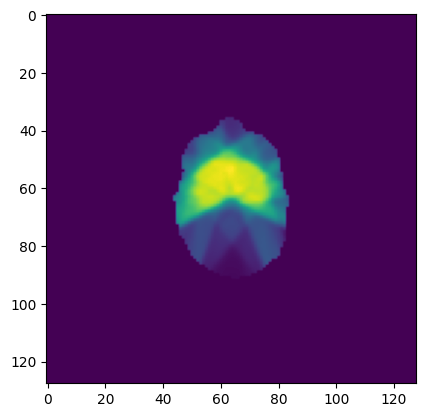

In [38]:
from pathlib import Path

import matplotlib.pyplot as plt

from provided_code.data_loader import DataLoader
from provided_code.utils import get_paths

primary_directory = Path().resolve()  # directory where everything is stored
provided_data_dir = primary_directory / "open-kbp/provided-data"
training_data_dir = provided_data_dir / "train-pats"
training_plan_paths = get_paths(training_data_dir)  # gets the path of each plan's directory
data_loader_train = DataLoader(training_plan_paths)
data_loader_train.set_mode("training_model")
batch = data_loader_train.get_patients(["pt_1"])

sample_dose = batch.dose[0]
plt.imshow(sample_dose[:, :, 40])
plt.show()

# Model training

Initialize a data loader for the training set data, and use it to initialize a prediction model object. Call the
train_model method to train the model for the predefined number of epochs.

In [8]:
# Train a model
data_loader_train = DataLoader(training_plan_paths)
dose_prediction_model_train = PredictionModel(data_loader_train, results_dir, prediction_name,  "train")
dose_prediction_model_train.train_model(epochs=num_epochs, save_frequency=1, keep_model_history=1)

Model: "generator"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                28, 1)]                                                           
                                                                                                  
 input_2 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                28, 10)]                                                          
                                                                                                  
 concatenate (Concatenate)      (None, 128, 128, 12  0           ['input_1[0][0]',                
                                8, 11)                            'input_2[0][0]']        

1it [00:23, 23.51s/it]

Model loss at epoch 0 batch 0 is 1.821


1it [00:40, 40.78s/it]


KeyboardInterrupt: 

Note that during training we will only keep models that are __save_frequency * keep_model_history__ epochs back from the
current epoch. We do this because models are very large (~1 GB).

Now that the model is trained we can use it to predict the dose for a set of hold-out patients from the validation or
testing set. The code block below gets the paths of all plans in the hold out set you selected earlier.


In [ ]:
# Define hold out set
hold_out_data_dir = validation_data_dir if test_time is False else testing_data_dir
stage_name, _ = hold_out_data_dir.stem.split("-")
hold_out_plan_paths = get_paths(hold_out_data_dir)

# Model testing

We start by making a new data loader for the held-out set, and use it to predict (and save) a
set of out-of-sample dose distributions. Note that we change the mode of the data loader to 'dose_prediction' to
load only the data needed to make a prediction.


In [ ]:
# Predict dose for the held out set
data_loader_hold_out = DataLoader(hold_out_plan_paths)
dose_prediction_model_hold_out = PredictionModel(data_loader_hold_out, results_dir, model_name=prediction_name, stage=stage_name)
dose_prediction_model_hold_out.predict_dose(epoch=num_epochs)

Load each predicted dose distribution and evaluate it against the ground truth using the
competition metrics.

In [ ]:
 # Evaluate dose metrics
data_loader_hold_out_eval = DataLoader(hold_out_plan_paths)
prediction_paths = get_paths(dose_prediction_model_hold_out.prediction_dir, extension="csv")
hold_out_prediction_loader = DataLoader(prediction_paths)
dose_evaluator = DoseEvaluator(data_loader_hold_out_eval, hold_out_prediction_loader)

# print out scores if data was left for a hold out set
if not data_loader_hold_out_eval.patient_paths:
    print("No patient information was given to calculate metrics")
else:
    dose_evaluator.evaluate()
    dvh_score, dose_score = dose_evaluator.get_scores()
    print(f"For this out-of-sample test on {stage_name}:\n\tthe DVH score is {dvh_score:.3f}\n\tthe dose score is {dose_score:.3f}")

# Saving results

Once you're happy with your dose distributions you can zip up the predictions with the code block below. The zipped file
will contain the dose distributions for the validation set. It can be uploaded directly to CodaLab.

In [ ]:
# Zip dose to submit
submission_dir = results_dir / "submissions"
submission_dir.mkdir(exist_ok=True)
submission_zipfile = shutil.make_archive(
    str(submission_dir / prediction_name),
    "zip",
    dose_prediction_model_hold_out.prediction_dir
)

You can save the model and submission to Google Drive or download them (on the left hand panel, click `...` -> `Download`).

In [ ]:
# Mount your personal google drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Save the submission
submissions_on_drive = Path('/content/drive/MyDrive/open-kbp-subissions')
submissions_on_drive.mkdir(exist_ok=True)
shutil.copy(submission_zipfile, submissions_on_drive / f'{prediction_name}.zip')

> Note that the model will be lost once you close the Colab session. You can download or save what's in the `results` folder.